In [241]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bok
import nltk
import json
import csv
import pylrc
from sklearn import *
from io import StringIO
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
from textblob import TextBlob
from nltk.corpus import stopwords

In [242]:
metadata = pd.read_csv('metadata_02.csv')

In [243]:
metadata

,Unnamed: 0,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Chorus Lyrics,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus
0,0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to ...,6.540230,2.473913,good drank big knots good drugs i put a four ...,6.000000,2.429907
1,2,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why...,8.202703,2.697778,i sit back and read like cat in the hat 21 sa...,9.666667,3.787249
2,3,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down...,8.603774,2.746988,im on that slaughter gang *****t murder gang ...,10.000000,0.338639
3,6,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch im really timeless i cannot waste no ti...,8.140000,2.608974,ive been pissin codeine and i aint wit the sh...,8.300000,3.594630
4,7,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,im drownin im drownin im drownin im drownin w...,8.328358,2.595349,nan wrist so icy wonder why she like me bitch...,8.166667,3.052960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,784,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh ...,7.774194,2.151786,it aint my fault,5.000000,0.146542
619,785,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as...,7.189655,1.837004,i would like to get to know you baby,10.000000,0.163425
620,786,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my d...,6.485714,2.247525,i live my day as if it was the last,11.000000,0.238457
621,789,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the ...,5.740741,1.483254,all you have to do is,7.000000,0.122420


In [244]:
metadata.drop('Unnamed: 0', axis=1, inplace=True)

In [245]:
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Chorus Lyrics,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to ...,6.540230,2.473913,good drank big knots good drugs i put a four ...,6.000000,2.429907
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why...,8.202703,2.697778,i sit back and read like cat in the hat 21 sa...,9.666667,3.787249
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down...,8.603774,2.746988,im on that slaughter gang *****t murder gang ...,10.000000,0.338639
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch im really timeless i cannot waste no ti...,8.140000,2.608974,ive been pissin codeine and i aint wit the sh...,8.300000,3.594630
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,im drownin im drownin im drownin im drownin w...,8.328358,2.595349,nan wrist so icy wonder why she like me bitch...,8.166667,3.052960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh ...,7.774194,2.151786,it aint my fault,5.000000,0.146542
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as...,7.189655,1.837004,i would like to get to know you baby,10.000000,0.163425
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my d...,6.485714,2.247525,i live my day as if it was the last,11.000000,0.238457
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the ...,5.740741,1.483254,all you have to do is,7.000000,0.122420


In [246]:
metadata.iloc[200]['Lyrics']

' oh yeah this is eminem baby back up in that mother******* ass one time for your mother ******* mind we represent the 313 you know what im saying cause they dont know *************t about this for the 96 nan ayo my pen and paper cause a chain reaction to get your brain relaxin cause they be actin maniac in action a brainiac in fact son you mainly lack attraction you looking zany whack with just a fraction of my tracks spun my rhyming skills got you climbing hills i travel through your mind until you spine like siren drills im sliming grills of roaches with sprayed on disinfectants with some ex rappers till their spinal column disconnects we disinfect then check the monologue turn your system up twist them up and indulge in the marijuana smoke this is the season for noise pollution contamination examination of more cartoons than animation my lamination of narration hits a snare and bass of track ****** up rapper interrogation when i declare invasion there aint no time to be stare and g

In [247]:
metadata['Lyrics'] = metadata['Lyrics'].apply(lambda x: " ". join(x for x in x.split() if x!='nan'))
metadata['Chorus Lyrics'] = metadata['Chorus Lyrics'].apply(lambda x: " ". join(x for x in str(x).split() if x!='nan'))

In [248]:
metadata['Lyrics'] = metadata['Lyrics'].replace('\d+', '')
metadata['Chorus Lyrics'] = metadata['Chorus Lyrics'].str.replace('\d+', '')

In [249]:
#metadata['Lyrics'] = metadata['Lyrics'].apply(lambda x: str(TextBlob(x).correct()))
#metadata['Chorus Lyrics'] = metadata['Chorus Lyrics'].apply(lambda x: str(TextBlob(x).correct()))

In [250]:
other_words = ['verse', 'chorus', 'intro', 'im', 'youre', 'ill', 'dont', 'thats']
metadata['Lyrics'] = metadata['Lyrics'].apply(lambda x: " ". join(x for x in x.split() if x not in other_words))
metadata['Chorus Lyrics'] = metadata['Chorus Lyrics'].apply(lambda x: " ". join(x for x in str(x).split() if x not in other_words))

In [251]:
stop = stopwords.words('english')

In [252]:
metadata['Tokens'] = metadata['Lyrics'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
metadata['Chorus Tokens'] = metadata['Chorus Lyrics'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))

In [253]:
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Chorus Lyrics,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus,Tokens,Chorus Tokens
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,2.473913,good drank big knots good drugs i put a four o...,6.000000,2.429907,uhh yeah alright hahah yeah used treat mattres...,good drank big knots good drugs put four rocks...
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,2.697778,i sit back and read like cat in the hat savage...,9.666667,3.787249,hook young savage trappin hard niggas cappin h...,sit back read like cat hat savage cat mac sava...
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,2.746988,on that slaughter gang *****t murder gang *****t,10.000000,0.338639,yeah yeah yeah pull roll window pop pop pop po...,slaughter gang *****t murder gang *****t
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,2.608974,ive been pissin codeine and i aint wit the shi...,8.300000,3.594630,bitch really timeless cannot waste time bitch ...,ive pissin codeine aint wit shits woah rocksta...
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,2.595349,wrist so icy wonder why she like me bitch drow...,8.166667,3.052960,drownin drownin drownin drownin wrist icy wond...,wrist icy wonder like bitch drownin water boug...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,2.151786,it aint my fault,5.000000,0.146542,oh oh oh oh oh oh oh oh oh oh aint fault keep ...,aint fault
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,1.837004,i would like to get to know you baby,10.000000,0.163425,didnt know could want deep saw someone got pla...,would like get know baby
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,2.247525,i live my day as if it was the last,11.000000,0.238457,live day last live day past doin nite summer d...,live day last
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,1.483254,all you have to do is,7.000000,0.122420,waiting time pass hope winds change change min...,


In [254]:
metadata.iloc[200]['Tokens']

'oh yeah eminem baby back mother******* ass one time mother ******* mind represent 313 know saying cause know *************t 96 ayo pen paper cause chain reaction get brain relaxin cause actin maniac action brainiac fact son mainly lack attraction looking zany whack fraction tracks spun rhyming skills got climbing hills travel mind spine like siren drills sliming grills roaches sprayed disinfectants ex rappers till spinal column disconnects disinfect check monologue turn system twist indulge marijuana smoke season noise pollution contamination examination cartoons animation lamination narration hits snare bass track ****** rapper interrogation declare invasion aint time stare gazing turn stage barren wasteland infinite heard hell well sent went surface sentenced murdering instruments trying repent hear beat tempted make another attempt infinite bust let beat commence beat sense elite defense got meet fence fruit stompin feet rinse greet intensive ladies spoil fans foil plans leave flui

In [255]:
negative = []
neutral = []
positive = []
compound = []
#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scores
for i in metadata.index:
    scores = sid.polarity_scores(metadata['Tokens'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
metadata['negative'] = negative
metadata['neutral'] = neutral
metadata['positive'] = positive
metadata['compound'] = compound
metadata.head()

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Chorus Lyrics,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus,Tokens,Chorus Tokens,negative,neutral,positive,compound
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,2.473913,good drank big knots good drugs i put a four o...,6.000000,2.429907,uhh yeah alright hahah yeah used treat mattres...,good drank big knots good drugs put four rocks...,0.101,0.600,0.299,0.9966
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,2.697778,i sit back and read like cat in the hat savage...,9.666667,3.787249,hook young savage trappin hard niggas cappin h...,sit back read like cat hat savage cat mac sava...,0.338,0.567,0.096,-0.9984
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,2.746988,on that slaughter gang *****t murder gang *****t,10.000000,0.338639,yeah yeah yeah pull roll window pop pop pop po...,slaughter gang *****t murder gang *****t,0.315,0.647,0.038,-0.9988
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,2.608974,ive been pissin codeine and i aint wit the shi...,8.300000,3.594630,bitch really timeless cannot waste time bitch ...,ive pissin codeine aint wit shits woah rocksta...,0.232,0.636,0.132,-0.9879
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,2.595349,wrist so icy wonder why she like me bitch drow...,8.166667,3.052960,drownin drownin drownin drownin wrist icy wond...,wrist icy wonder like bitch drownin water boug...,0.197,0.706,0.097,-0.9909


In [256]:
metadata.tail()

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Chorus Lyrics,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus,Tokens,Chorus Tokens,negative,neutral,positive,compound
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,2.151786,it aint my fault,5.0,0.146542,oh oh oh oh oh oh oh oh oh oh aint fault keep ...,aint fault,0.136,0.537,0.326,0.9913
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,1.837004,i would like to get to know you baby,10.0,0.163425,didnt know could want deep saw someone got pla...,would like get know baby,0.045,0.590,0.365,0.9984
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,2.247525,i live my day as if it was the last,11.0,0.238457,live day last live day past doin nite summer d...,live day last,0.065,0.798,0.137,0.9552
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,1.483254,all you have to do is,7.0,0.122420,waiting time pass hope winds change change min...,,0.056,0.904,0.041,-0.2168
622,996,996.mp3,Trouble,offaiah,Trouble,50.17,02:05,02:53,facing the battle through all of my problems a...,2.666667,0.943820,,2.0,0.039864,facing battle problems secret models nothing t...,,0.459,0.346,0.195,-0.9730


In [257]:
import lyric_features

In [258]:
avg_word_length = list()
avg_word_length_chorus = list()
vocabulary_richness_lyrics = list()
vocabulary_richness_chorus = list()
function_word_freq = list()

for i, m_data in metadata.iterrows():
    avg_word_length.append(lyric_features.average_word_length(m_data['Lyrics'].split(' '))[0])
    avg_word_length_chorus.append(lyric_features.average_word_length(m_data['Chorus Lyrics'].split(' '))[0])
    vocabulary_richness_lyrics.append(lyric_features.vocabulary_richness(m_data['Tokens'])[0])
    vocabulary_richness_chorus.append(lyric_features.vocabulary_richness(m_data['Chorus Tokens'])[0])
    function_word_freq.append(np.array(lyric_features.function_word_frequencies(m_data['Lyrics'])).mean())
    
    
metadata['Average Word Length in Lyrics'] = avg_word_length
metadata['Average Word Length in Chorus'] = avg_word_length_chorus
metadata['Lyrics Vocabulary Richness'] = vocabulary_richness_lyrics
metadata['Chorus Vocabulary Richness'] = vocabulary_richness_chorus
metadata['Function Word Frequencies'] = function_word_freq

In [259]:
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,Chorus Tokens,negative,neutral,positive,compound,Average Word Length in Lyrics,Average Word Length in Chorus,Lyrics Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,good drank big knots good drugs put four rocks...,0.101,0.600,0.299,0.9966,3.658845,3.736842,0.019875,0.091241,0.001442
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,sit back read like cat hat savage cat mac sava...,0.338,0.567,0.096,-0.9984,3.994941,4.064516,0.015248,0.024412,0.001506
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,slaughter gang *****t murder gang *****t,0.315,0.647,0.038,-0.9988,3.945701,5.125000,0.017640,0.350000,0.001190
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,ive pissin codeine aint wit shits woah rocksta...,0.232,0.636,0.132,-0.9879,3.833333,3.835443,0.023221,0.083636,0.001210
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,wrist icy wonder like bitch drownin water boug...,0.197,0.706,0.097,-0.9909,4.029470,4.044944,0.015464,0.076412,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,aint fault,0.136,0.537,0.326,0.9913,3.400000,3.250000,0.019688,0.800000,0.001164
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,would like get know baby,0.045,0.590,0.365,0.9984,3.364090,3.111111,0.022202,0.625000,0.001418
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,live day last,0.065,0.798,0.137,0.9552,3.463415,2.600000,0.018182,0.769231,0.001352
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,,0.056,0.904,0.041,-0.2168,3.528814,2.666667,0.032670,0.000000,0.001468


In [260]:
metadata.to_csv('metadata_03.csv')

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=None, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(metadata['Tokens'])
print(tfidf)

  (0, 2368)	0.03631684565957886
  (0, 5604)	0.032906438893990364
  (0, 4835)	0.06302351230969791
  (0, 1603)	0.0670556514322785
  (0, 6065)	0.06016266407392704
  (0, 8448)	0.04046263720410399
  (0, 2330)	0.0670556514322785
  (0, 4935)	0.05209838582876588
  (0, 9982)	0.06302351230969791
  (0, 4076)	0.0388808217398086
  (0, 1573)	0.0670556514322785
  (0, 9533)	0.03726465571051593
  (0, 7778)	0.06016266407392704
  (0, 2731)	0.04701849130463826
  (0, 6126)	0.03155850963882592
  (0, 7169)	0.05209838582876588
  (0, 2283)	0.04466772814126999
  (0, 4357)	0.027114816116496143
  (0, 3815)	0.053269676715575594
  (0, 4044)	0.05613052495134646
  (0, 439)	0.06016266407392704
  (0, 5149)	0.05209838582876588
  (0, 5289)	0.036093364823706224
  (0, 1265)	0.05459757680248116
  (0, 8092)	0.05753588139364928
  :	:
  (621, 9898)	0.04560404660019883
  (621, 10349)	0.040120387425753
  (621, 4393)	0.040120387425753
  (621, 5748)	0.04844203597157141
  (621, 868)	0.03934556368609662
  (621, 9921)	0.0512121835622

In [262]:
tfidf.shape

(623, 10384)

In [263]:
type(tfidf)

scipy.sparse.csr.csr_matrix

In [264]:
tfidf_df = pd.DataFrame(tfidf.toarray())

In [265]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,10374,10375,10376,10377,10378,10379,10380,10381,10382,10383
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
tfidf_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,10374,10375,10376,10377,10378,10379,10380,10381,10382,10383
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,...,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.000120,0.000069,0.000090,0.000314,0.000120,0.000099,0.000046,0.000172,0.000314,0.000062,...,0.000333,0.000060,0.000261,0.000060,0.000055,0.000067,0.000437,0.000067,0.000098,0.000293
std,0.003007,0.001713,0.002255,0.007845,0.003007,0.002473,0.001140,0.004300,0.007845,0.001546,...,0.006187,0.001490,0.004771,0.001490,0.001376,0.001671,0.010908,0.001671,0.002440,0.007321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.075064,0.042767,0.056287,0.195809,0.075064,0.061723,0.028466,0.107322,0.195809,0.038597,...,0.137825,0.037179,0.103206,0.037179,0.034348,0.041716,0.272268,0.041716,0.060913,0.182740


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
class MyPCA:
    def __init__(self):
        pass
    
    def perform_PCA(self, X, n_components=3):
        cols = ['column'+str(i) for i in range(X.shape[1])]
        X.columns = cols

        X = StandardScaler().fit_transform(X)
        self.X = X
        self.n_components = n_components

        self.pca = PCA(self.n_components)
        self.pca_dims = self.pca.fit_transform(self.X)

        self.pca_result = pd.DataFrame(data = self.pca_dims)
        return self.pca_result

    def explain_variance(self):
        print("Explained Variance per Principal Component:\n{}".format(self.pca.explained_variance_ratio_))

    def plot_variance(self):
        plt.rcParams["figure.figsize"] = (24,12)
        fig, ax = plt.subplots()
        xi = np.arange(1, self.pca_result.shape[1]+1, step=1)
        y = np.cumsum(self.pca.explained_variance_ratio_)

        plt.ylim(0.0, 1.1)
        plt.plot(xi, y, marker='o', linestyle='--', color='b')
        plt.xlabel('Number of Features')
        plt.ylabel('Cumulative Variance Percentage')
        plt.title('Variance explained through Number of Features')

        plt.axhline(y=self.n_components, color='r', linestyle='-')
        ax.grid(axis='x')
        plt.show()

In [4]:
pca = MyPCA()

In [269]:
pca_res = pca.perform_PCA(tfidf_df, n_components=0.99)

In [270]:
pca_res.shape

(623, 576)

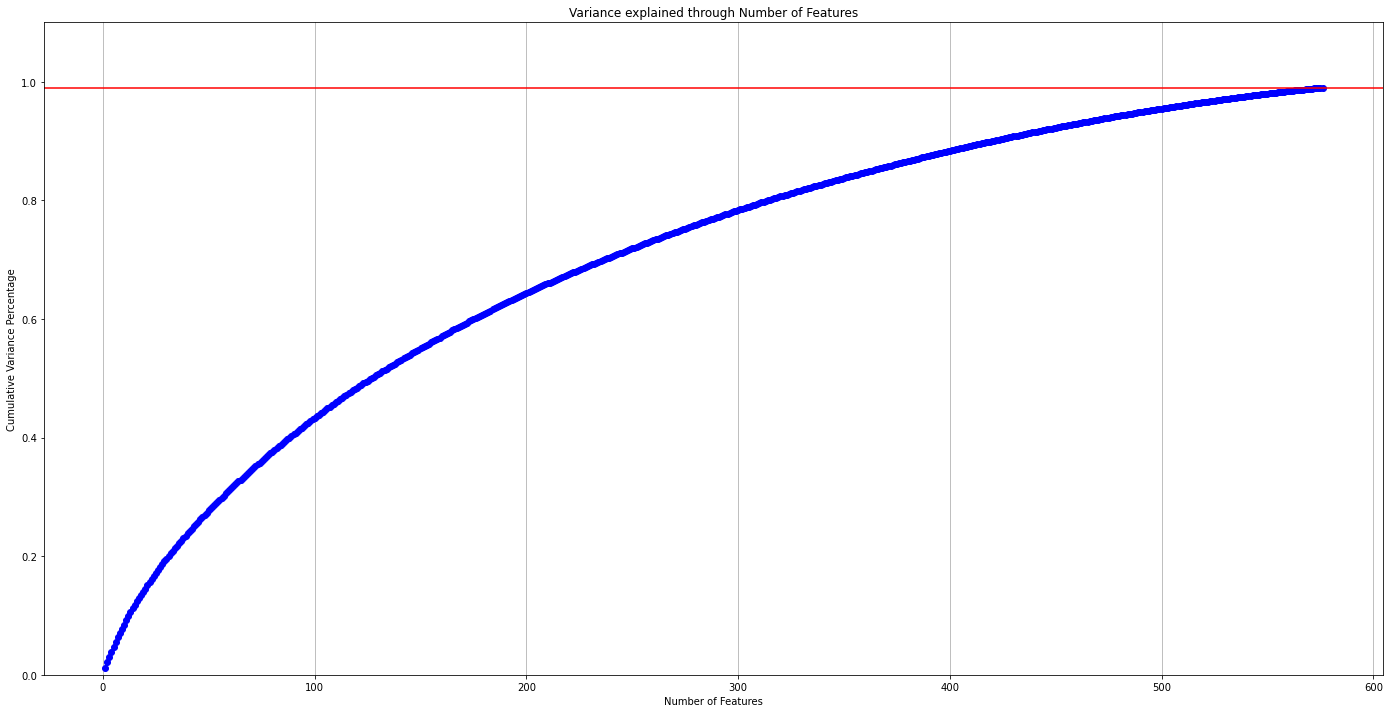

In [271]:
pca.plot_variance()

In [272]:
tfidf_df.to_csv('tfidf_orig.csv')

In [273]:
pca_res.to_csv('tfidf_PCA.csv')

In [274]:
pca_res

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.372514,-1.131089,-4.053200,0.036860,0.433837,4.066642,-0.411591,-0.697551,13.444840,8.207451,...,-0.057821,-0.067388,0.039689,0.022218,-0.032597,0.083274,-0.034556,-0.006326,-0.081149,0.023123
1,-0.021232,-0.068678,-2.645587,0.336421,0.208905,1.439549,-0.206336,-0.253360,2.568004,3.105128,...,-0.044444,0.111993,-0.156471,0.163564,0.062939,-0.112892,0.191584,0.043665,-0.075168,0.052911
2,-0.437151,-0.525415,-0.664850,-0.210955,-0.064710,-0.566562,-0.203647,-0.079869,0.723133,0.203518,...,-0.025932,0.039786,0.059235,-0.234305,-0.015047,0.099914,-0.052799,-0.167495,0.187817,-0.060391
3,0.302196,-0.833174,-1.614257,0.596998,0.106135,-0.987560,-0.259543,-0.100091,-0.150844,0.354404,...,0.013733,0.009456,-0.046425,0.006060,-0.006678,0.044585,0.016278,0.047413,-0.127037,0.051024
4,-0.484528,-0.380687,-1.162074,-0.398932,0.094664,1.049898,1.490700,-0.071681,0.639735,0.061694,...,0.143784,0.011110,0.027412,0.041198,0.007037,-0.039545,0.013504,0.023842,0.030525,0.006152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,-0.648877,-0.473254,-0.666935,-0.839443,0.045920,-0.865274,-0.240840,-0.004606,-0.612131,-0.886945,...,-0.021916,-0.014778,0.323793,-0.016760,-1.089046,0.120146,-0.034135,0.357434,-0.094611,-0.050540
619,-0.811595,-0.366282,-0.406003,-0.871507,0.017761,-0.963611,-0.106265,-0.001111,-0.646797,-0.969973,...,-1.723127,-2.133114,1.203167,4.158603,-1.694081,-2.871828,-0.800811,3.081932,-2.928625,-1.130741
620,-0.812087,-0.114974,-0.792614,-0.837195,0.060975,-0.885524,-0.173591,-0.004911,-0.779217,-0.746024,...,0.027397,0.136398,-0.232210,0.221880,-0.018520,0.490769,0.504708,-0.687689,0.248730,0.083299
621,-0.824177,-0.450140,-0.659544,-0.918170,0.048541,-1.016463,-0.105731,-0.001834,-0.700440,-0.627355,...,-0.321950,2.026346,-0.287379,0.061485,0.958677,1.182823,0.479887,-0.867533,1.958348,-0.181946


In [275]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

c:\python38\lib\site-packages\tqdm\std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [276]:
def add_label(lyr):
    output = []
    for i, s in zip(lyr.index, lyr):
        output.append(LabeledSentence(s, ["lyric_" + str(i)]))
    return output

labeled_lyrics = add_label(metadata['Tokens']) # label all the tweets

<ipython-input-276-c6bc8f4f3219>:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  output.append(LabeledSentence(s, ["lyric_" + str(i)]))


In [277]:
labeled_lyrics

[LabeledSentence(words='uhh yeah alright hahah yeah used treat mattress like atm yeah bond number 9 favorite scent yeah cant forget kush talking og yeah rest peace pop og oh yeah 285 pack uh cannot forget strap yeah rest peace nigga doe doe tru ever want ball easy part playing weezy hard sit kitchen late tryna make escape trying make mil ima keep plate told em shawty leave imma keep rake ima keep wraith jewelry look like lake today maybach car came drapes know look like safe put back place look right face sing bitch like drake yeah good drank big knots good drugs put four rocks lean drop top hot box 12 tried pull pink slips cops said molly give thizz face put dick rib cage whips kunta kinte diamonds clear like bombay take babies harambe play keys like doc dre 3k like andré girl call cum face gucci huh brr huh trunk front well check top trunk play money check poppin trunk three mil month three years bunk oh slump headed oakland like kevin da runt point square stamp **** kevin durant lay

In [278]:
model = Doc2Vec(size=300, window=10, min_count=5, workers=11,alpha=0.01, min_alpha=0.01) # use fixed learning rate
model.build_vocab(labeled_lyrics)
for epoch in range(10):
    model.train(labeled_lyrics, epochs = model.epochs, total_examples=623)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca

c:\python38\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [279]:
model

In [280]:
infervec1 = model.infer_vector(metadata.iloc[0]['Tokens'].split(' '))
infervec2 = model.infer_vector(metadata.iloc[1]['Tokens'].split(' '))

In [281]:
docvec1 = model.docvecs[0]
docvec2 = model.docvecs[1]

In [282]:
n1 = np.linalg.norm(infervec1)
n2 = np.linalg.norm(infervec2)
print(n1, n2)

0.2012956 0.016271062


In [283]:
d1 = np.linalg.norm(docvec1)
d2 = np.linalg.norm(docvec2)
print(d1, d2)

2.2451723 1.7932158


In [284]:
docvec0 = model.docvecs['lyric_0']
d0 = np.linalg.norm(docvec0)
print(d0)

2.2451723


In [285]:
infervec3 = model.infer_vector(metadata.iloc[2]['Tokens'].split(' '))
docvec3 = model.docvecs[2]
n3 = np.linalg.norm(infervec3)
d3 = np.linalg.norm(docvec3)
print(n3, d3)

0.017019175 2.7911673


In [286]:
len(model.docvecs)

623

In [287]:
similar = model.docvecs.most_similar(34)
similar

[('lyric_143', 0.6663086414337158),
 ('lyric_105', 0.6596909165382385),
 ('lyric_397', 0.6487326622009277),
 ('lyric_132', 0.6262732148170471),
 ('lyric_107', 0.6179749965667725),
 ('lyric_393', 0.6137738227844238),
 ('lyric_458', 0.6118950247764587),
 ('lyric_482', 0.6117957830429077),
 ('lyric_329', 0.6055246591567993),
 ('lyric_336', 0.595528244972229)]

In [288]:
metadata.iloc[34]['Tokens']

'last night took l tonight bounce back wake every morning night count stacks knew ass real hit bounce back bounce back aint getting checks last night took l tonight bounce back boy broke hell cashed check bounced back town lax every week bounce back real one know bounce back owe nobody owe nobody always f**kin job got hobbies got city f**kin cause homegrown vibin phone though leave lone though look cut bitch like edit daddy g genetics straight heard ya new shit pathetic ya contract shredded took dogs private jet public housing kept g yeah one thousand clique star studded like paramount mountain everything righteous betting right risk even f**king crisis never switching sides shit switch gears night shift blacking cause enlightened god talk silence hear every time mane thank god god bless thank much last night took l tonight bounce back wake every morning night count stacks knew ass real hit bounce back bounce back aint getting checks last night took l tonight bounce back boy broke hell

In [289]:
metadata.iloc[143]['Tokens']

'moon outside bright blinds yeah lets keep closed know hands know go find finger tips trace back lips take trip flip switch make world go black hit like heart attack knock flat back yeah keep thing brush hair swear know long last make world go black black make world black black like dress floor yeah one need anymore black like sky stars find fall arms make world go black hit like heart attack knock flat back yeah keep thing brush hair swear know long last make world go black black make world black black wanna see thing baby wanna feel touch feel rush wanna see thing wanna feel love make world go black hit like heart attack knock flat back yeah keep thing brush hair swear know long last make world go black black make world black black make world go black wanna see thing wanna feel touch feel rush'

In [290]:
ranks = []
second_ranks = []
for doc_id in range(623):
    inferred_vector = model.infer_vector(metadata.iloc[doc_id]['Tokens'].split(' '))
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims]
    ranks.append(rank)
    second_ranks.append(sims[1])

In [291]:
print(len(ranks), len(second_ranks))

623 623


In [292]:
type(model.docvecs)

gensim.models.keyedvectors.Doc2VecKeyedVectors

In [293]:
doc_vector = list()
doc_vec_norm = list()
infer_vec = list()
infer_vec_norm = list()
for i, m_data in metadata.iterrows():
    doc_vector.append(model.docvecs[i])
    doc_vec_norm.append(np.linalg.norm(model.docvecs[i]))
    infer_vec.append(model.infer_vector(m_data['Tokens'].split(' ')))
    infer_vec_norm.append(np.linalg.norm(model.infer_vector(m_data['Tokens'].split(' '))))
    
metadata['Document Vectors'] = doc_vector
metadata['Doc Vec Norm'] = doc_vec_norm
metadata['Infer Vectors'] = infer_vec
metadata['Infer Vec Norm'] = infer_vec_norm
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,compound,Average Word Length in Lyrics,Average Word Length in Chorus,Lyrics Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,0.9966,3.658845,3.736842,0.019875,0.091241,0.001442,"[0.18611862, -0.06029744, -0.3776672, -0.53237...",2.245172,"[-0.008933435, 0.009469013, -2.1690998e-05, 0....",0.201296
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,-0.9984,3.994941,4.064516,0.015248,0.024412,0.001506,"[0.15178719, -0.030455856, -0.060235415, 0.060...",1.793216,"[-0.002740667, -0.000862031, -0.00074763113, -...",0.016271
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,-0.9988,3.945701,5.125000,0.017640,0.350000,0.001190,"[0.16748863, -0.14754751, -0.19698061, -0.1179...",2.791167,"[-0.00090189325, 0.0011235524, -1.1227629e-05,...",0.017019
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,-0.9879,3.833333,3.835443,0.023221,0.083636,0.001210,"[0.06116468, -0.054895177, -0.06282094, -0.020...",1.114908,"[0.00087967387, -0.006343615, 0.010889657, 0.0...",0.076152
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,-0.9909,4.029470,4.044944,0.015464,0.076412,0.001000,"[0.08365379, -0.091941975, 0.023294186, 0.1175...",1.566652,"[0.0038851197, -0.012823942, 0.023010287, 0.01...",0.441977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,0.9913,3.400000,3.250000,0.019688,0.800000,0.001164,"[-0.030267116, 0.0315481, -0.02052715, -0.0072...",1.363090,"[-0.0014834837, -0.0011817028, -0.0015185571, ...",0.016947
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,0.9984,3.364090,3.111111,0.022202,0.625000,0.001418,"[-0.036281355, 0.1024885, 0.006038447, -0.1295...",1.647133,"[-5.304207e-05, -0.00045458385, -0.0005251556,...",0.016490
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,0.9552,3.463415,2.600000,0.018182,0.769231,0.001352,"[-0.10055403, 0.041315205, 0.11575256, 0.15791...",1.471850,"[-0.00025889362, -0.0015618496, -0.0007676021,...",0.016133
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,-0.2168,3.528814,2.666667,0.032670,0.000000,0.001468,"[-0.0401632, 0.051996063, 0.14626868, 0.187894...",1.066196,"[0.0008127489, 0.0006836038, -0.0011456911, 0....",0.016926


In [294]:
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,compound,Average Word Length in Lyrics,Average Word Length in Chorus,Lyrics Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,0.9966,3.658845,3.736842,0.019875,0.091241,0.001442,"[0.18611862, -0.06029744, -0.3776672, -0.53237...",2.245172,"[-0.008933435, 0.009469013, -2.1690998e-05, 0....",0.201296
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,-0.9984,3.994941,4.064516,0.015248,0.024412,0.001506,"[0.15178719, -0.030455856, -0.060235415, 0.060...",1.793216,"[-0.002740667, -0.000862031, -0.00074763113, -...",0.016271
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,-0.9988,3.945701,5.125000,0.017640,0.350000,0.001190,"[0.16748863, -0.14754751, -0.19698061, -0.1179...",2.791167,"[-0.00090189325, 0.0011235524, -1.1227629e-05,...",0.017019
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,-0.9879,3.833333,3.835443,0.023221,0.083636,0.001210,"[0.06116468, -0.054895177, -0.06282094, -0.020...",1.114908,"[0.00087967387, -0.006343615, 0.010889657, 0.0...",0.076152
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,-0.9909,4.029470,4.044944,0.015464,0.076412,0.001000,"[0.08365379, -0.091941975, 0.023294186, 0.1175...",1.566652,"[0.0038851197, -0.012823942, 0.023010287, 0.01...",0.441977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,0.9913,3.400000,3.250000,0.019688,0.800000,0.001164,"[-0.030267116, 0.0315481, -0.02052715, -0.0072...",1.363090,"[-0.0014834837, -0.0011817028, -0.0015185571, ...",0.016947
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,0.9984,3.364090,3.111111,0.022202,0.625000,0.001418,"[-0.036281355, 0.1024885, 0.006038447, -0.1295...",1.647133,"[-5.304207e-05, -0.00045458385, -0.0005251556,...",0.016490
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,0.9552,3.463415,2.600000,0.018182,0.769231,0.001352,"[-0.10055403, 0.041315205, 0.11575256, 0.15791...",1.471850,"[-0.00025889362, -0.0015618496, -0.0007676021,...",0.016133
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,-0.2168,3.528814,2.666667,0.032670,0.000000,0.001468,"[-0.0401632, 0.051996063, 0.14626868, 0.187894...",1.066196,"[0.0008127489, 0.0006836038, -0.0011456911, 0....",0.016926


In [295]:
static_annot = pd.read_csv(r'./PMEmo/PMEmo2019/annotations/static_annotations.csv')
static_annot

,musicId,Arousal(mean),Valence(mean)
0,1,0.4000,0.5750
1,4,0.2625,0.2875
2,5,0.1500,0.2000
3,6,0.5125,0.3500
4,7,0.7000,0.7250
...,...,...,...
762,993,0.8625,0.7625
763,996,0.8750,0.5625
764,997,0.7125,0.6625
765,999,0.8750,0.7750


In [296]:
metadata = pd.merge(metadata,static_annot,on='musicId',how='left')
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,Average Word Length in Chorus,Lyrics Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm,Arousal(mean),Valence(mean)
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,3.736842,0.019875,0.091241,0.001442,"[0.18611862, -0.06029744, -0.3776672, -0.53237...",2.245172,"[-0.008933435, 0.009469013, -2.1690998e-05, 0....",0.201296,0.4000,0.5750
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,4.064516,0.015248,0.024412,0.001506,"[0.15178719, -0.030455856, -0.060235415, 0.060...",1.793216,"[-0.002740667, -0.000862031, -0.00074763113, -...",0.016271,0.1500,0.2000
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,5.125000,0.017640,0.350000,0.001190,"[0.16748863, -0.14754751, -0.19698061, -0.1179...",2.791167,"[-0.00090189325, 0.0011235524, -1.1227629e-05,...",0.017019,0.5125,0.3500
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,3.835443,0.023221,0.083636,0.001210,"[0.06116468, -0.054895177, -0.06282094, -0.020...",1.114908,"[0.00087967387, -0.006343615, 0.010889657, 0.0...",0.076152,0.4500,0.2875
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,4.044944,0.015464,0.076412,0.001000,"[0.08365379, -0.091941975, 0.023294186, 0.1175...",1.566652,"[0.0038851197, -0.012823942, 0.023010287, 0.01...",0.441977,0.4375,0.4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,3.250000,0.019688,0.800000,0.001164,"[-0.030267116, 0.0315481, -0.02052715, -0.0072...",1.363090,"[-0.0014834837, -0.0011817028, -0.0015185571, ...",0.016947,0.7750,0.5000
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,3.111111,0.022202,0.625000,0.001418,"[-0.036281355, 0.1024885, 0.006038447, -0.1295...",1.647133,"[-5.304207e-05, -0.00045458385, -0.0005251556,...",0.016490,0.8250,0.7375
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,2.600000,0.018182,0.769231,0.001352,"[-0.10055403, 0.041315205, 0.11575256, 0.15791...",1.471850,"[-0.00025889362, -0.0015618496, -0.0007676021,...",0.016133,0.7500,0.7000
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,2.666667,0.032670,0.000000,0.001468,"[-0.0401632, 0.051996063, 0.14626868, 0.187894...",1.066196,"[0.0008127489, 0.0006836038, -0.0011456911, 0....",0.016926,0.8625,0.7625


In [297]:
static_annot_std = pd.read_csv(r'./PMEmo/PMEmo2019/annotations/static_annotations_std.csv')
static_annot_std

,musicId,Arousal(std),Valence(std)
0,1,0.156125,0.160078
1,4,0.152582,0.158607
2,5,0.175000,0.203101
3,6,0.171847,0.200000
4,7,0.139194,0.122474
...,...,...,...
762,993,0.103833,0.152582
763,996,0.111803,0.245268
764,997,0.177218,0.112500
765,999,0.096825,0.122474


In [298]:
metadata = pd.merge(metadata,static_annot_std,on='musicId',how='left')
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,Chorus Vocabulary Richness,Function Word Frequencies,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm,Arousal(mean),Valence(mean),Arousal(std),Valence(std)
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,0.091241,0.001442,"[0.18611862, -0.06029744, -0.3776672, -0.53237...",2.245172,"[-0.008933435, 0.009469013, -2.1690998e-05, 0....",0.201296,0.4000,0.5750,0.156125,0.160078
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,0.024412,0.001506,"[0.15178719, -0.030455856, -0.060235415, 0.060...",1.793216,"[-0.002740667, -0.000862031, -0.00074763113, -...",0.016271,0.1500,0.2000,0.175000,0.203101
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,0.350000,0.001190,"[0.16748863, -0.14754751, -0.19698061, -0.1179...",2.791167,"[-0.00090189325, 0.0011235524, -1.1227629e-05,...",0.017019,0.5125,0.3500,0.171847,0.200000
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,0.083636,0.001210,"[0.06116468, -0.054895177, -0.06282094, -0.020...",1.114908,"[0.00087967387, -0.006343615, 0.010889657, 0.0...",0.076152,0.4500,0.2875,0.203101,0.158607
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,0.076412,0.001000,"[0.08365379, -0.091941975, 0.023294186, 0.1175...",1.566652,"[0.0038851197, -0.012823942, 0.023010287, 0.01...",0.441977,0.4375,0.4250,0.195656,0.139194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,0.800000,0.001164,"[-0.030267116, 0.0315481, -0.02052715, -0.0072...",1.363090,"[-0.0014834837, -0.0011817028, -0.0015185571, ...",0.016947,0.7750,0.5000,0.108972,0.158114
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,0.625000,0.001418,"[-0.036281355, 0.1024885, 0.006038447, -0.1295...",1.647133,"[-5.304207e-05, -0.00045458385, -0.0005251556,...",0.016490,0.8250,0.7375,0.100000,0.087500
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,0.769231,0.001352,"[-0.10055403, 0.041315205, 0.11575256, 0.15791...",1.471850,"[-0.00025889362, -0.0015618496, -0.0007676021,...",0.016133,0.7500,0.7000,0.147902,0.160078
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,0.000000,0.001468,"[-0.0401632, 0.051996063, 0.14626868, 0.187894...",1.066196,"[0.0008127489, 0.0006836038, -0.0011456911, 0....",0.016926,0.8625,0.7625,0.103833,0.152582


In [299]:
metadata

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,Chorus Vocabulary Richness,Function Word Frequencies,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm,Arousal(mean),Valence(mean),Arousal(std),Valence(std)
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,0.091241,0.001442,"[0.18611862, -0.06029744, -0.3776672, -0.53237...",2.245172,"[-0.008933435, 0.009469013, -2.1690998e-05, 0....",0.201296,0.4000,0.5750,0.156125,0.160078
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,0.024412,0.001506,"[0.15178719, -0.030455856, -0.060235415, 0.060...",1.793216,"[-0.002740667, -0.000862031, -0.00074763113, -...",0.016271,0.1500,0.2000,0.175000,0.203101
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,0.350000,0.001190,"[0.16748863, -0.14754751, -0.19698061, -0.1179...",2.791167,"[-0.00090189325, 0.0011235524, -1.1227629e-05,...",0.017019,0.5125,0.3500,0.171847,0.200000
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch really timeless i cannot waste no time b...,8.140000,...,0.083636,0.001210,"[0.06116468, -0.054895177, -0.06282094, -0.020...",1.114908,"[0.00087967387, -0.006343615, 0.010889657, 0.0...",0.076152,0.4500,0.2875,0.203101,0.158607
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,drownin drownin drownin drownin wrist so icy w...,8.328358,...,0.076412,0.001000,"[0.08365379, -0.091941975, 0.023294186, 0.1175...",1.566652,"[0.0038851197, -0.012823942, 0.023010287, 0.01...",0.441977,0.4375,0.4250,0.195656,0.139194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,0.800000,0.001164,"[-0.030267116, 0.0315481, -0.02052715, -0.0072...",1.363090,"[-0.0014834837, -0.0011817028, -0.0015185571, ...",0.016947,0.7750,0.5000,0.108972,0.158114
619,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,0.625000,0.001418,"[-0.036281355, 0.1024885, 0.006038447, -0.1295...",1.647133,"[-5.304207e-05, -0.00045458385, -0.0005251556,...",0.016490,0.8250,0.7375,0.100000,0.087500
620,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,0.769231,0.001352,"[-0.10055403, 0.041315205, 0.11575256, 0.15791...",1.471850,"[-0.00025889362, -0.0015618496, -0.0007676021,...",0.016133,0.7500,0.7000,0.147902,0.160078
621,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,0.000000,0.001468,"[-0.0401632, 0.051996063, 0.14626868, 0.187894...",1.066196,"[0.0008127489, 0.0006836038, -0.0011456911, 0....",0.016926,0.8625,0.7625,0.103833,0.152582


In [302]:
metadata.to_csv('lyrics_final.csv')

In [301]:
metadata.describe()

,musicId,duration,Avg. Words/Sentence in Song,Avg. Words/Second in Song,Avg. Words/Sentence in Chorus,Avg. Words/Second in Chorus,negative,neutral,positive,compound,...,Average Word Length in Chorus,Lyrics Vocabulary Richness,Chorus Vocabulary Richness,Function Word Frequencies,Doc Vec Norm,Infer Vec Norm,Arousal(mean),Valence(mean),Arousal(std),Valence(std)
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,...,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,603.000000,603.000000,603.000000,603.000000
mean,485.314607,37.871284,6.524937,1.967081,6.933089,1.233282,0.130421,0.643093,0.226478,0.435343,...,3.714635,0.025260,0.341470,0.001211,1.489220,0.058210,0.622722,0.596727,0.147055,0.162584
std,282.151935,13.799153,1.461176,1.595048,2.655622,1.145580,0.097188,0.129273,0.117368,0.808424,...,1.200123,0.010994,0.293550,0.000297,0.618295,0.134667,0.183615,0.160513,0.045987,0.045542
min,1.000000,11.080000,0.000000,0.000000,1.000000,0.018460,0.000000,0.096000,0.000000,-0.999900,...,0.000000,0.007240,0.000000,0.000444,0.607177,0.015397,0.125000,0.137500,0.050000,0.057282
25%,233.500000,29.110000,5.582734,1.386171,5.000000,0.181200,0.064500,0.561000,0.142000,-0.291400,...,3.375906,0.017477,0.098252,0.001015,1.100229,0.016444,0.494318,0.487500,0.112500,0.130504
50%,478.000000,35.110000,6.408451,1.822727,6.833333,0.923900,0.111000,0.645000,0.213000,0.958000,...,3.714286,0.022840,0.188679,0.001193,1.341022,0.016726,0.650000,0.612500,0.141973,0.158607
75%,728.500000,45.140000,7.485346,2.372383,8.571429,2.157379,0.176000,0.726000,0.300500,0.993100,...,4.044211,0.030075,0.578947,0.001371,1.692359,0.017132,0.762500,0.725000,0.175000,0.192029
max,996.000000,88.240000,11.657895,31.600000,17.000000,4.517705,0.865000,1.000000,0.670000,0.999700,...,14.000000,0.082524,1.000000,0.002725,5.578679,1.485444,0.975000,0.912500,0.316475,0.313498


In [171]:
metadata_temp = pd.merge(metadata,static_annot_std,on='musicId',how='inner')
metadata_temp

,musicId,fileName,title,artist,album,duration,chorus_start_time,chorus_end_time,Lyrics,Avg. Words/Sentence in Song,...,Document Vectors,Doc Vec Norm,Infer Vectors,Infer Vec Norm,Arousal(mean),Valence(mean),Arousal(std)_x,Valence(std)_x,Arousal(std)_y,Valence(std)_y
0,1,1.mp3,Good Drank,2 Chainz,"Def Jam Presents: Direct Deposit, Vol. 2",32.10,02:35,03:05,uhh yeah alright i did it hahah yeah used to t...,6.540230,...,"[-0.09172795, -0.10879898, -0.17515473, -0.436...",2.214081,"[0.0030794833, 0.015040252, 0.007138282, 0.034...",0.196948,0.4000,0.5750,0.156125,0.160078,0.156125,0.160078
1,5,5.mp3,No Heart,21 Savage,Savage Mode,84.23,00:41,02:03,hook young savage why you trappin so hard why ...,8.202703,...,"[0.056748822, 0.08701668, 0.013502626, 0.12093...",1.799955,"[0.0014324486, -0.00037089383, -0.0005409416, ...",0.016556,0.1500,0.2000,0.175000,0.203101,0.175000,0.203101
2,6,6.mp3,Red Opps,21 Savage,Red Opps,29.53,02:16,02:44,yeah yeah yeah i pull up roll the window down ...,8.603774,...,"[0.02366523, 0.12645537, 0.20690247, 0.3788928...",2.544707,"[-0.0016347164, 0.0016010714, -0.0011539157, 0...",0.016623,0.5125,0.3500,0.171847,0.200000,0.171847,0.200000
3,9,9.mp3,Timeless,A Boogie Wit Da Hoodie,TBA,23.09,01:57,02:18,bitch im really timeless i cannot waste no tim...,8.140000,...,"[0.10268561, -0.087107316, -0.105517894, -0.05...",1.096957,"[-0.019839406, -0.0155630205, -0.0035106216, -...",0.240764,0.4500,0.2875,0.203101,0.158607,0.203101,0.158607
4,10,10.mp3,Drowning,A Boogie Wit Da Hoodie,Drowning,32.10,02:43,03:13,im drownin im drownin im drownin im drownin wr...,8.328358,...,"[0.06500893, -0.011020172, 0.110488124, 0.1722...",1.693539,"[-0.02215627, -0.023405597, -0.006859795, -0.0...",0.470192,0.4375,0.4250,0.195656,0.139194,0.195656,0.139194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,983,983.mp3,Ain't My Fault,Zara Larsson,Ain't My Fault,34.12,03:12,03:44,oh my oh my oh my oh my oh my oh my oh my oh m...,7.774194,...,"[0.0343414, -0.0037363316, -0.028753992, 0.016...",1.378119,"[-0.0005039736, 0.00025364786, -0.0012436828, ...",0.016732,0.7750,0.5000,0.108972,0.158114,0.108972,0.158114
599,984,984.mp3,I Would Like,Zara Larsson,I Would Like,61.19,02:47,03:46,i didnt know that i could want you so deep as ...,7.189655,...,"[0.035651233, -0.0034552016, -0.023257425, -0....",1.730619,"[-0.00015011449, 0.001003642, -0.00027420511, ...",0.015817,0.8250,0.7375,0.100000,0.087500,0.100000,0.087500
600,985,985.mp3,Lush Life,Zara Larsson,Lush Life,46.13,02:37,03:21,i live my day as if it was the last live my da...,6.485714,...,"[-0.048618186, -0.0150124775, 0.015114263, -0....",1.469588,"[0.001398295, -0.0002328877, -0.0009519347, 0....",0.017059,0.7500,0.7000,0.147902,0.160078,0.147902,0.160078
601,993,993.mp3,Stay,Zedd,Stay,57.18,02:35,03:30,waiting for the time to pass you by hope the w...,5.740741,...,"[0.06465163, -0.035583373, -0.015471746, 0.016...",1.124778,"[-0.00012906031, 0.0004766554, 0.00063163845, ...",0.017057,0.8625,0.7625,0.103833,0.152582,0.103833,0.152582


In [303]:
wpt = nltk.WordPunctTokenizer()

In [304]:
metadata.iloc[1]['Tokens']

'hook young savage trappin hard niggas cappin hard got 12 car garage pullin rappers cards cause niggas pussy hard turn ****ing soft hard grew streets without heart praying glock card 1 sit back read like cat hat 21 savage cat mac 21 savage boyz n hood pull shoot ass back stuart little heard niggas rats pockets full cheese bitch got racks real street nigga bitch one niggas bangin wax pussy niggas love sneak dissing til pull em slap em fire wet mamas house wet grandmas house keep shootin somebody die many shots neighbor looked calendar thought fourth july friends playing nintendo playin round fire seventh grade got caught pistol sent pantherville eighth grade started playin football like **** field ninth grade knocking niggas nigga like holyfield fast forward nigga 2016 screaming **** deal bad bitch thick even need pill listen raps thought hard aint even street real niggas love sneak dissing twitter want beef real niggas play like tough till nigga get killed till nigga get spilled til bl

In [306]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KHUSHALI VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [309]:
text_tagged = nltk.pos_tag(wpt.tokenize(metadata.iloc[1]['Tokens']))
text_tagged

[('hook', 'NN'),
 ('young', 'JJ'),
 ('savage', 'NN'),
 ('trappin', 'JJ'),
 ('hard', 'JJ'),
 ('niggas', 'NN'),
 ('cappin', 'NN'),
 ('hard', 'JJ'),
 ('got', 'VBD'),
 ('12', 'CD'),
 ('car', 'NN'),
 ('garage', 'NN'),
 ('pullin', 'NN'),
 ('rappers', 'NNS'),
 ('cards', 'NNS'),
 ('cause', 'VBP'),
 ('niggas', 'JJ'),
 ('pussy', 'JJ'),
 ('hard', 'JJ'),
 ('turn', 'NN'),
 ('****', 'NNP'),
 ('ing', 'VBG'),
 ('soft', 'JJ'),
 ('hard', 'JJ'),
 ('grew', 'VBD'),
 ('streets', 'NNS'),
 ('without', 'IN'),
 ('heart', 'NN'),
 ('praying', 'VBG'),
 ('glock', 'NN'),
 ('card', 'NN'),
 ('1', 'CD'),
 ('sit', 'NN'),
 ('back', 'RB'),
 ('read', 'VBP'),
 ('like', 'IN'),
 ('cat', 'NNS'),
 ('hat', 'RB'),
 ('21', 'CD'),
 ('savage', 'NN'),
 ('cat', 'NN'),
 ('mac', 'VBD'),
 ('21', 'CD'),
 ('savage', 'NN'),
 ('boyz', 'NN'),
 ('n', 'RB'),
 ('hood', 'VBD'),
 ('pull', 'JJ'),
 ('shoot', 'NN'),
 ('ass', 'NN'),
 ('back', 'RB'),
 ('stuart', 'JJ'),
 ('little', 'JJ'),
 ('heard', 'NN'),
 ('niggas', 'NN'),
 ('rats', 'NNS'),
 ('pockets

In [311]:
pos_tagged = list()
tags_joined = list()
for i, m_data in metadata.iterrows():
    text_tagged = nltk.pos_tag(wpt.tokenize(metadata.iloc[i]['Tokens']))
    pos_tagged.append(text_tagged)
    joined = "".join(convert(tag) for (word, tag) in text_tagged)
    tags_joined.append(joined)
    text_pos_inv_convert()

In [313]:
metadata['Pos Tagged Tokens'] = pos_tagged
metadata['Joint Tags'] = tags_joined

In [317]:
metadata.columns

Index(['musicId', 'fileName', 'title', 'artist', 'album', 'duration',
       'chorus_start_time', 'chorus_end_time', 'Lyrics',
       'Avg. Words/Sentence in Song', 'Avg. Words/Second in Song',
       'Chorus Lyrics', 'Avg. Words/Sentence in Chorus',
       'Avg. Words/Second in Chorus', 'Tokens', 'Chorus Tokens', 'negative',
       'neutral', 'positive', 'compound', 'Average Word Length in Lyrics',
       'Average Word Length in Chorus', 'Lyrics Vocabulary Richness',
       'Chorus Vocabulary Richness', 'Function Word Frequencies',
       'Document Vectors', 'Doc Vec Norm', 'Infer Vectors', 'Infer Vec Norm',
       'Arousal(mean)', 'Valence(mean)', 'Arousal(std)', 'Valence(std)',
       'Pos Tagged Tokens'],
      dtype='object')

In [314]:
metadata.to_csv('lyrics_final.csv')

In [2]:
import pandas as pd
lyrics_df = pd.read_csv('lyrics_final.csv')
new_df = lyrics_df[['Avg. Words/Sentence in Song', 'Avg. Words/Second in Song', 'Avg. Words/Sentence in Chorus', 'Avg. Words/Second in Chorus', 'negative', 'positive', 'neutral', 'compound', 'Average Word Length in Lyrics', 'Average Word Length in Chorus', 'Lyrics Vocabulary Richness', 'Chorus Vocabulary Richness', 'Function Word Frequencies', 'Doc Vec Norm', 'Infer Vec Norm']]

In [5]:
pca_res_this = pca.perform_PCA(new_df, n_components=0.99)

In [6]:
pca_res_this.shape

(623, 14)

In [7]:
pca_res_this

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.823626,-1.492219,0.096562,-1.062448,0.344367,0.920814,0.637650,0.893988,-0.236549,0.712164,0.113183,0.260246,0.015064,-0.140901
1,3.025567,1.375922,1.699182,-1.301685,1.021514,-1.008939,1.463406,-0.332279,0.460332,-0.139600,0.070783,-0.341073,-0.177654,-0.608167
2,2.984705,1.865527,0.765828,1.577580,1.331346,-0.507132,0.427329,-0.541980,-0.467862,0.221512,0.507290,1.122235,0.514622,0.402957
3,2.028362,1.160879,1.261588,-1.352681,-0.222856,-1.049341,0.270538,-0.084033,1.012560,0.047722,-0.244375,-0.202386,-0.791042,-0.310736
4,3.352440,0.735458,0.514397,-0.716931,0.224649,-0.259005,-1.074860,1.982425,1.293637,-0.313453,-0.448318,-0.040298,-0.802235,0.006710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,-1.158751,-0.614980,1.179236,1.441976,-0.510349,0.910542,0.049347,-0.352119,-0.463676,0.750451,-1.314851,0.312987,0.091806,-0.332893
619,-0.881759,-1.491982,0.787580,1.668632,-0.908427,0.164545,1.112513,0.090610,-0.726630,0.517838,0.147887,-0.155714,-0.270336,0.432642
620,0.290066,-0.473365,-0.507567,2.185281,-1.884644,0.104567,0.679585,-0.279578,-0.468800,0.032119,0.327798,-1.145488,0.374484,-0.118968
621,0.283380,1.169755,-1.851463,-0.312223,-2.381010,0.005912,0.866446,-0.228910,0.163549,-0.503638,0.178084,-0.038384,0.324868,1.466293


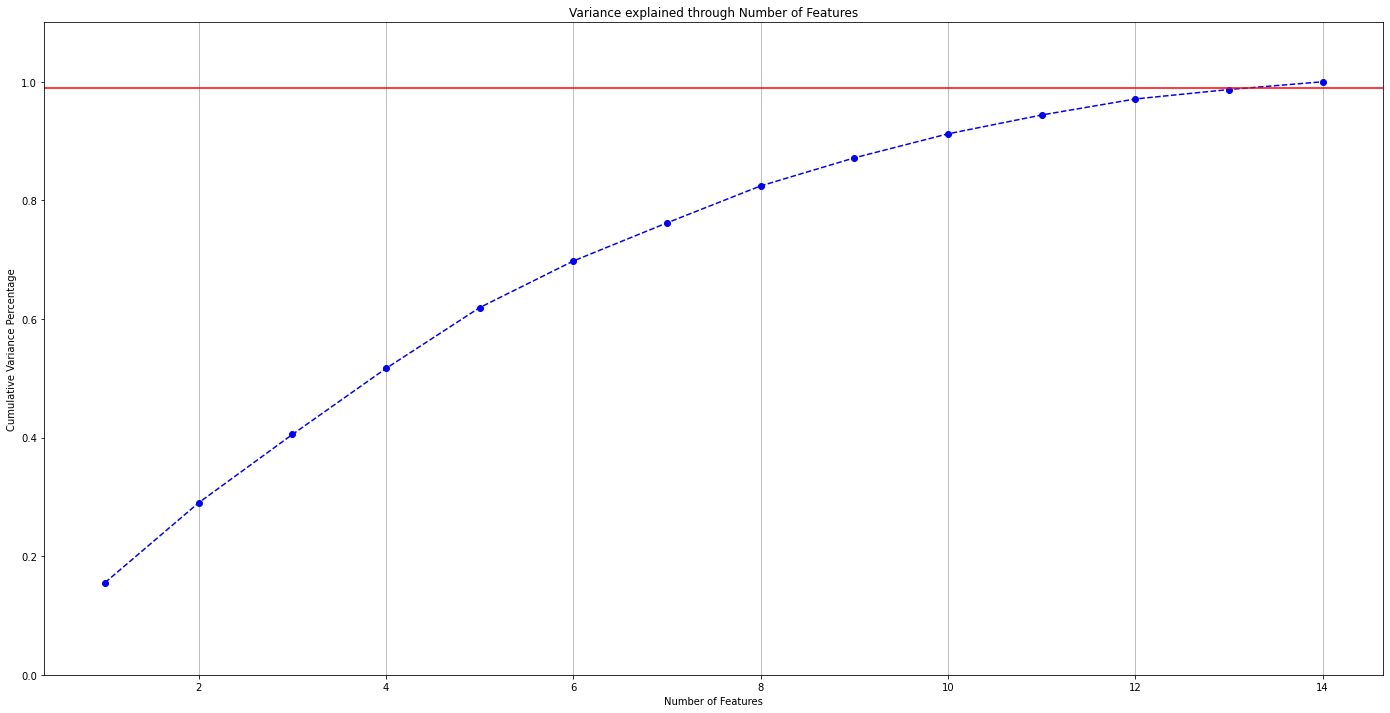

In [10]:
import matplotlib.pyplot as plt
import numpy as np
pca.plot_variance()

In [16]:
import pandas as pd
import numpy as np

linguistic_features = pd.read_csv('linguistic_features_01.csv')
linguistic_features.drop('Unnamed: 0', axis=1, inplace=True)

tf_idf = pd.read_csv('tfidf_PCA.csv')
tf_idf.drop('Unnamed: 0', axis=1, inplace=True)

index = linguistic_features.loc[pd.isna(linguistic_features["Arousal(mean)"]), :].index
tf_idf.drop(index, axis=0, inplace=True)

In [17]:
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0.372514,-1.131089,-4.053200,0.036860,0.433837,4.066642,-0.411591,-0.697551,13.444840,8.207451,...,-0.057821,-0.067388,0.039689,0.022218,-0.032597,0.083274,-0.034556,-0.006326,-0.081149,0.023123
1,-0.021232,-0.068678,-2.645587,0.336421,0.208905,1.439549,-0.206336,-0.253360,2.568004,3.105128,...,-0.044444,0.111993,-0.156471,0.163564,0.062939,-0.112892,0.191584,0.043665,-0.075168,0.052911
2,-0.437151,-0.525415,-0.664850,-0.210955,-0.064710,-0.566562,-0.203647,-0.079869,0.723133,0.203518,...,-0.025932,0.039786,0.059235,-0.234305,-0.015047,0.099914,-0.052799,-0.167495,0.187817,-0.060391
3,0.302196,-0.833174,-1.614257,0.596998,0.106135,-0.987560,-0.259543,-0.100091,-0.150844,0.354404,...,0.013733,0.009456,-0.046425,0.006060,-0.006678,0.044585,0.016278,0.047413,-0.127037,0.051024
4,-0.484528,-0.380687,-1.162074,-0.398932,0.094664,1.049898,1.490700,-0.071681,0.639735,0.061694,...,0.143784,0.011110,0.027412,0.041198,0.007037,-0.039545,0.013504,0.023842,0.030525,0.006152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,-0.648877,-0.473254,-0.666935,-0.839443,0.045920,-0.865274,-0.240840,-0.004606,-0.612131,-0.886945,...,-0.021916,-0.014778,0.323793,-0.016760,-1.089046,0.120146,-0.034135,0.357434,-0.094611,-0.050540
619,-0.811595,-0.366282,-0.406003,-0.871507,0.017761,-0.963611,-0.106265,-0.001111,-0.646797,-0.969973,...,-1.723127,-2.133114,1.203167,4.158603,-1.694081,-2.871828,-0.800811,3.081932,-2.928625,-1.130741
620,-0.812087,-0.114974,-0.792614,-0.837195,0.060975,-0.885524,-0.173591,-0.004911,-0.779217,-0.746024,...,0.027397,0.136398,-0.232210,0.221880,-0.018520,0.490769,0.504708,-0.687689,0.248730,0.083299
621,-0.824177,-0.450140,-0.659544,-0.918170,0.048541,-1.016463,-0.105731,-0.001834,-0.700440,-0.627355,...,-0.321950,2.026346,-0.287379,0.061485,0.958677,1.182823,0.479887,-0.867533,1.958348,-0.181946


In [13]:
index = linguistic_features['Arousal(mean)'].index[linguistic_features['Arousal(mean)'].isna()==True]
df_index = linguistic_features.index.values.tolist()
df_index

AttributeError: 'Series' object has no attribute 'isnan'